In [ ]:
from pandas import DataFrame, read_csv
import numpy as np
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

file_path = r'/content/drive/MyDrive/data/ml-1m/ratings.dat'
# 파일 로드 및 field명 지정
ratingsDF = pd.read_csv(file_path, sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')

print("[raitings.dat의 head(20) 출력]")
print(ratingsDF.head(20))
print("\n[rating.dat 상세 정보]")
print(ratingsDF.info())
print("\n[수치 통계]")
print(ratingsDF.describe())


# 출력 결과를 통해 UserID의 개수와 MovieID의 개수를 알 수 있으며,
# rating의 경우 1 - 5 사이의 값을 가지고 있음을 알 수 있다.
# 또한, 분위수를 통해 rating 4가 가장 많이 존재함을 확인할 수 있다.


[raitings.dat의 head(20) 출력]
    UserID  MovieID  Rating  Timestamp
0        1     1193       5  978300760
1        1      661       3  978302109
2        1      914       3  978301968
3        1     3408       4  978300275
4        1     2355       5  978824291
5        1     1197       3  978302268
6        1     1287       5  978302039
7        1     2804       5  978300719
8        1      594       4  978302268
9        1      919       4  978301368
10       1      595       5  978824268
11       1      938       4  978301752
12       1     2398       4  978302281
13       1     2918       4  978302124
14       1     1035       5  978301753
15       1     2791       4  978302188
16       1     2687       3  978824268
17       1     2018       4  978301777
18       1     3105       5  978301713
19       1     2797       4  978302039

[rating.dat 상세 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-N

'\n출력 결과를 통해 UserID의 개수와 MovieID의 개수를 알 수 있으며,\nrating의 경우 1 - 5 사이의 값을 가지고 있음을 알 수 있다.\n또한, 분위수를 통해 rating 4가 가장 많이 존재함을 확인할 수 있다.\n'

In [ ]:
# clustering을 userID와 movieID, rating 만으로 하기 위해 Timestamp 행 제거
user_movie_matrix = ratingsDF.drop(columns=['Timestamp'])
# Timestamp를 제거한 matrix에 대해 UserID * MovieID 의 형태로 ratring을 나타내는 matrix 생성 및 출력
# matrix 생성 시 없는 값에 대해서는 0이 아닌 nan으로 표기
user_movie_matrix = user_movie_matrix.pivot(index='UserID', columns='MovieID', values='Rating').fillna(np.nan)
print("[User x Moive Matrix]")
print(user_movie_matrix.head())
print("\n[user_movie_matrix describe]")
print(user_movie_matrix.describe())

User x Moive Matrix:
MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN  ...   

MovieID  3943  3944  3945  3946  3947  3948  3949  3950  3951  3952  
UserID                                                               
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN 

In [ ]:
# K-means clustering을 수행하는 함수. 6040개의 UserID를 3개의 cluster로 분류
def perform_kmeans(matrix, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(matrix.fillna(0)) # NaN 값의 경우 0으로 대체
    return clusters, kmeans

# 2차원으로 시각화 하는 함수
def visualize_clusters2D(matrix, clusters):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(matrix.fillna(0))

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis')
    plt.title('K-Means Clustering of Users in 2D')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Cluster')
    plt.show()

# 3차원으로 시각화 하는 함수
def visualize_clusters_3d(matrix, clusters):
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(matrix.fillna(0))

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],
                         c=clusters, cmap='viridis', marker='o')

    legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
    ax.add_artist(legend1)

    ax.set_title('K-Means Clustering of Users in 3D')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터링 결과:
[1 2 1 ... 1 1 2]

K-Means 객체:
KMeans(n_clusters=3, random_state=0)


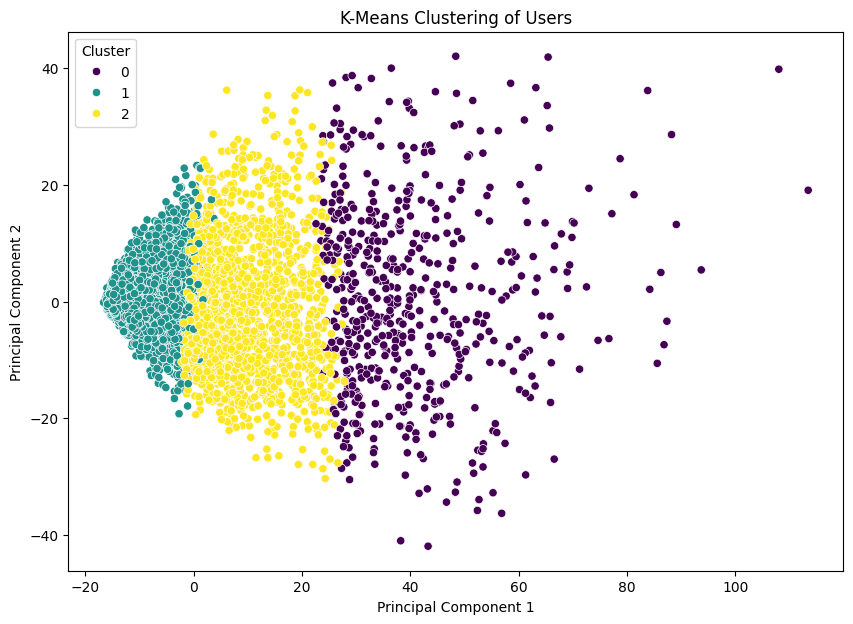

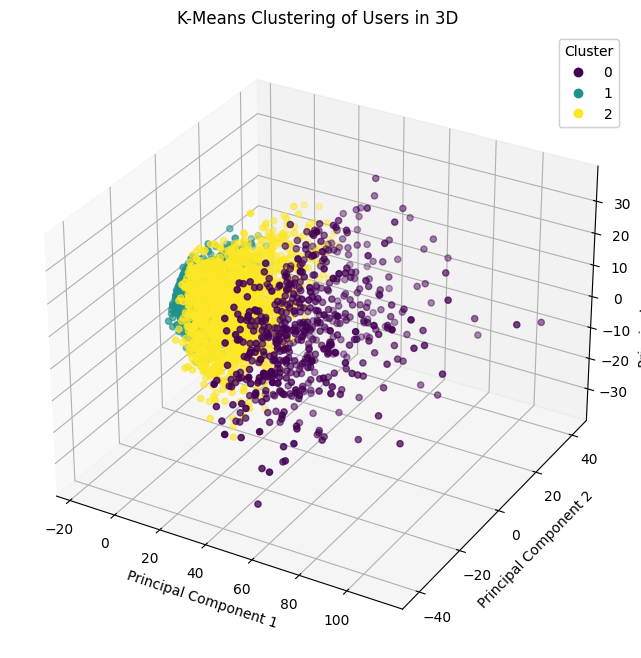

In [ ]:
clusters, kmeans = perform_kmeans(user_movie_matrix, n_clusters=3) # K-means 수행
# 수행 결과에 대한 정보 출력
print("클러스터링 결과:")
print(clusters)
print("\nK-Means 객체:")
print(kmeans)

# 시각화 출력
visualize_clusters2D(user_movie_matrix, clusters)
visualize_clusters_3d(user_movie_matrix, clusters)

In [ ]:
# clustering 한 결과를 바탕으로 추천을 위한 6가지 알고리즘 함수

def calculate_avg(df, clusters): # Avg 계산 함수
    # cluster가 합쳐진 dataframe을 인자로 받아 각 cluster와 MovieID에 대해 rating의 평균을 계산.
    avg_matrix = df.groupby(['Cluster', 'MovieID'])['Rating'].mean().unstack().fillna(0)
    print("\n\n[Average(Avg) Algorithm]")
    print(avg_matrix)
    return avg_matrix

def calculate_au(df, clusters):# AU 계산 함수
    au_matrix = df.groupby(['Cluster', 'MovieID'])['Rating'].sum().unstack().fillna(0)
    print("\n\n[Additive Utillitarian(AU) Algorithm]:")
    print(au_matrix)
    return au_matrix

def calculate_sc(df, clusters):# SC 계산 함수
    sc_matrix = df.groupby(['Cluster', 'MovieID'])['Rating'].count().unstack().fillna(0)
    print("\n\n[Simple Count(SC) Algorithm]")
    print(sc_matrix)
    return sc_matrix

def calculate_approval_voting(df, clusters):# AV 계산 함수
    av_matrix = df[df['Rating'] >= 4].groupby(['Cluster', 'MovieID'])['Rating'].count().unstack().fillna(0)
    print("\n\n[Approval Voting(AV) Algorithm]")
    print(av_matrix)
    return av_matrix

def calculate_bc(df, clusters):# BC 계산 함수
    df['Cluster'] = clusters[df['UserID'] - 1]
    # cluster로 그룹화 후 UserID 별로 MovieID에 대한 Rating 값을 rank.
    # 이때, 같은 값을 가지는 item에 대해서는 평균값을 취하는 방식으로 수행
    df['Rank'] = df.groupby(['Cluster', 'UserID'])['Rating'].rank(ascending=False, method='average')

    # 최대 순위 계산 및 Borda 값으로 변환
    max_rank = df['Rank'].max().
    df['Borda'] = max_rank - df['Rank']

    # cluster, MovieID별로 Borda 값의 sum을 계산 및 출력
    bc_matrix = df.groupby(['Cluster', 'MovieID'])['Borda'].sum().unstack().fillna(0)
    print("\n\n[Borda Count(BC) Algorithm]")
    print(bc_matrix)
    return bc_matrix

## 수정필요
def calculate_cr(df, clusters):
    df['Cluster'] = clusters[df['UserID'] - 1]
    unique_movies = df['MovieID'].unique()  # 고유 영화 ID 목록 추출
    cr_matrix = pd.DataFrame(index=range(3), columns=unique_movies)  # CR 값을 저장할 데이터프레임 생성

    for cluster in range(3):
        cluster_data = df[df['Cluster'] == cluster]  # cluster의 data 추출
        for movie in unique_movies:
            # 해당 영화와 다른 영화들의 평균 평점을 비교하여 승패 횟수를 계산합니다.
            wins = sum(cluster_data.groupby('MovieID')['Rating'].mean() > cluster_data[cluster_data['MovieID'] == movie]['Rating'].mean())
            losses = sum(cluster_data.groupby('MovieID')['Rating'].mean() < cluster_data[cluster_data['MovieID'] == movie]['Rating'].mean())
            cr_matrix.at[cluster, movie] = wins - losses  # 승패 차이를 CR 점수로 저장합니다.

    cr_matrix = cr_matrix.fillna(0).
    cr_matrix = cr_matrix.sort_index(axis=1)
    print("\n\n[Copeland Rule(CR) Algorithm]")
    print(cr_matrix)
    return cr_matrix


mean (상위 20개 항목):
MovieID      1         2         3         4         5         6         7     \
Cluster                                                                         
0        4.248322  3.143396  2.954023  2.662338  2.924242  3.823151  3.222798   
1        4.127049  3.335664  3.179856  2.588235  3.183333  3.907317  3.778846   
2        4.112472  3.187713  2.945455  2.898305  3.009615  3.905660  3.397516   

MovieID      8         9         10    ...      3943  3944      3945  \
Cluster                                ...                             
0        3.037037  2.592593  3.467742  ...  3.266667   2.5  1.200000   
1        3.105263  2.863636  3.650000  ...  2.677419   2.0  2.000000   
2        2.909091  2.615385  3.552632  ...  3.200000   2.0  1.391304   

MovieID      3946      3947      3948      3949      3950      3951      3952  
Cluster                                                                        
0        2.250000  3.894737  3.554455  4.141593  3.7000

In [ ]:
# UserID가 1부터 시작하므로 인덱스를 맞추기 위해 -1로 cluster의 값을 대응시킴
ratingsDF['Cluster'] = clusters[ratingsDF['UserID'] - 1]

# 6개의 알고리즘을 수행하는 함수 실행 및 저장
au_matrix = calculate_mean(ratingsDF, clusters)
avg_matrix = calculate_sum(ratingsDF, clusters)
sc_matrix = calculate_count(ratingsDF, clusters)
av_matrix = calculate_approval_voting(ratingsDF, clusters)
bc_matrix = calculate_bc(ratingsDF, clusters)
cr_matrix = calculate_cr(ratingsDF, clusters)

mean (상위 20개 항목):
MovieID      1         2         3         4         5         6         7     \
Cluster                                                                         
0        4.248322  3.143396  2.954023  2.662338  2.924242  3.823151  3.222798   
1        4.127049  3.335664  3.179856  2.588235  3.183333  3.907317  3.778846   
2        4.112472  3.187713  2.945455  2.898305  3.009615  3.905660  3.397516   

MovieID      8         9         10    ...      3943  3944      3945  \
Cluster                                ...                             
0        3.037037  2.592593  3.467742  ...  3.266667   2.5  1.200000   
1        3.105263  2.863636  3.650000  ...  2.677419   2.0  2.000000   
2        2.909091  2.615385  3.552632  ...  3.200000   2.0  1.391304   

MovieID      3946      3947      3948      3949      3950      3951      3952  
Cluster                                                                        
0        2.250000  3.894737  3.554455  4.141593  3.7000

Plotting for AU Matrix
AU Matrix - Cluster 0: Top MovieIDs: [572, 666, 696, 787, 853, 981, 2538, 3232, 3338, 858]
AU Matrix - Cluster 1: Top MovieIDs: [53, 128, 130, 598, 649, 823, 854, 989, 1787, 1830]
AU Matrix - Cluster 2: Top MovieIDs: [167, 557, 578, 687, 787, 1002, 1149, 1360, 1369, 1384]


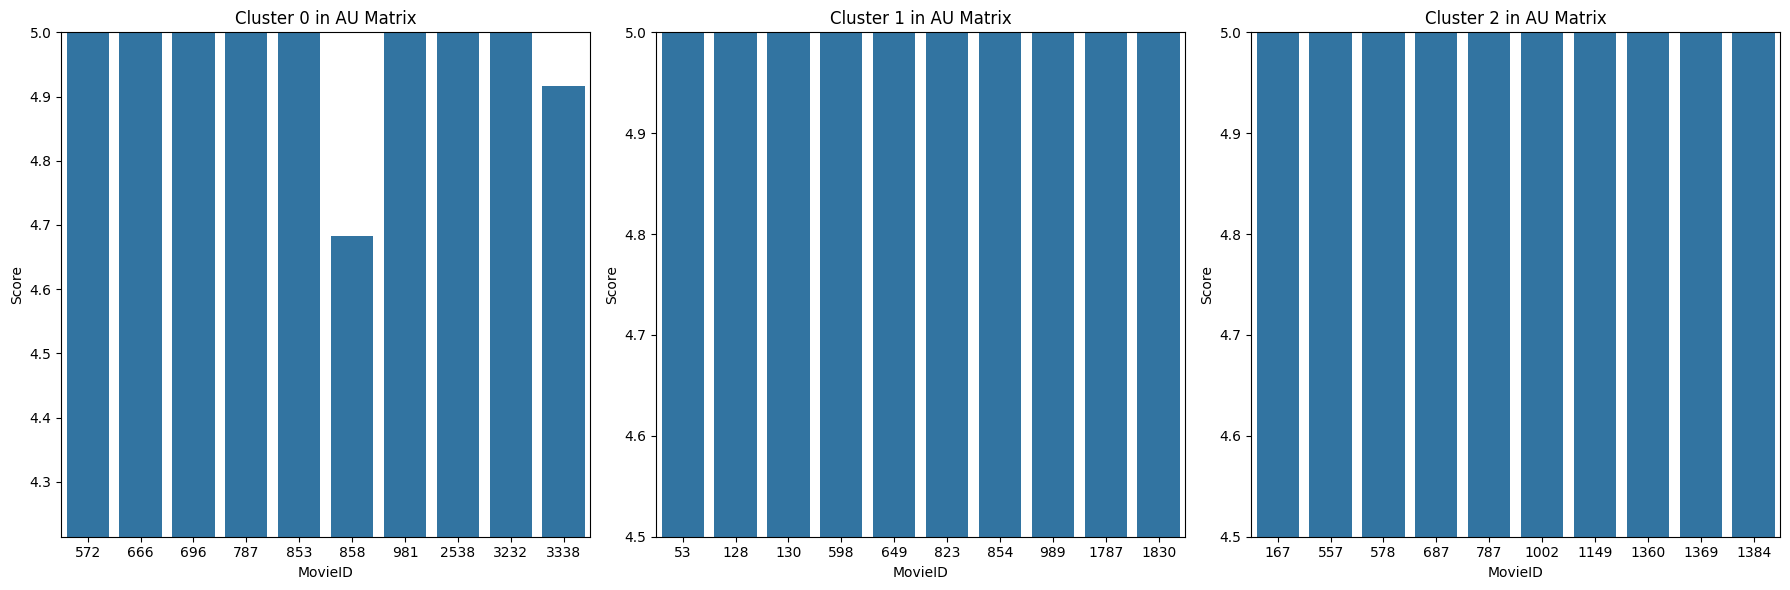

Plotting for Avg Matrix
Avg Matrix - Cluster 0: Top MovieIDs: [260, 1196, 1198, 1270, 608, 593, 296, 858, 2571, 2858]
Avg Matrix - Cluster 1: Top MovieIDs: [2858, 260, 1196, 2028, 1210, 2762, 593, 527, 2396, 110]
Avg Matrix - Cluster 2: Top MovieIDs: [1196, 260, 2571, 1198, 2858, 1210, 2028, 589, 593, 1270]


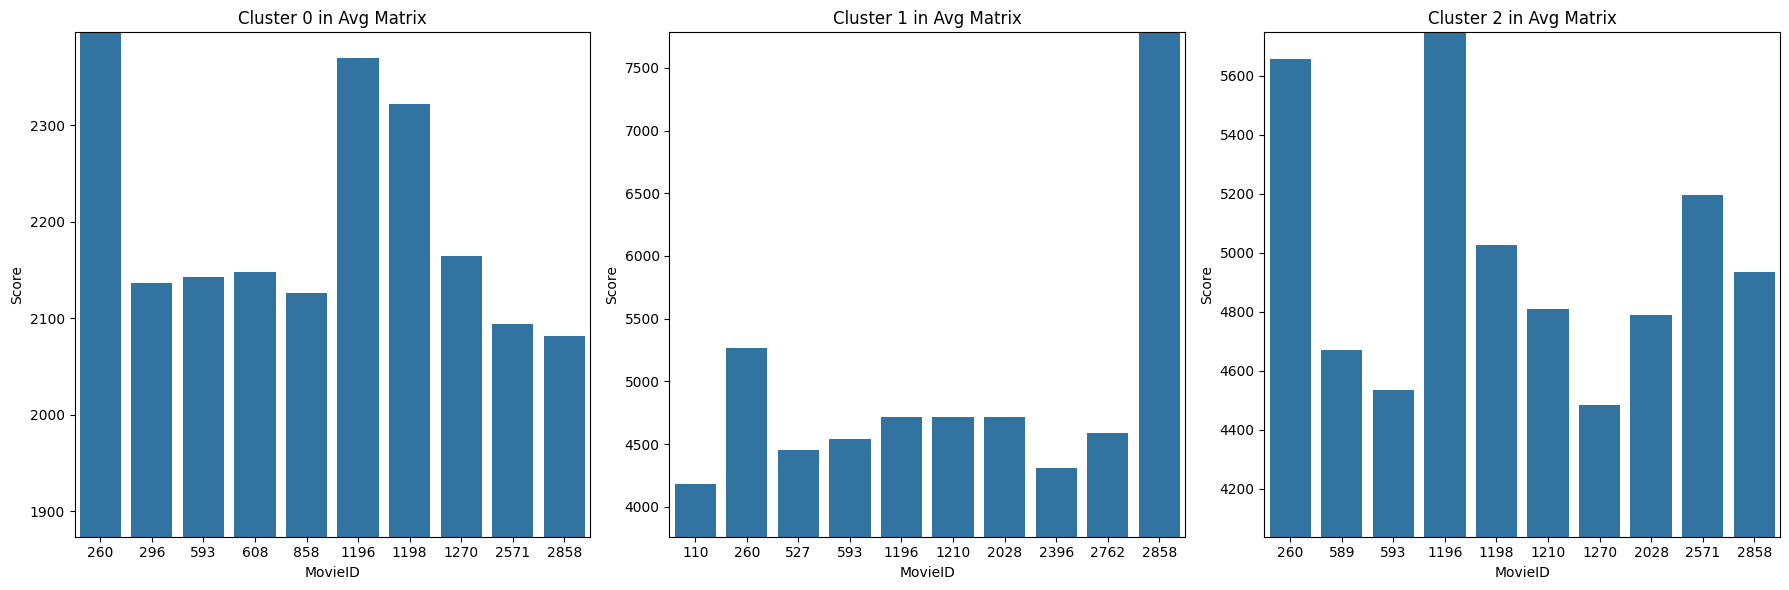

Plotting for SC Matrix
SC Matrix - Cluster 0: Top MovieIDs: [1196, 260, 1270, 1580, 1097, 1210, 2716, 1198, 589, 480]
SC Matrix - Cluster 1: Top MovieIDs: [2858, 260, 1210, 1196, 2028, 593, 480, 2396, 2762, 2997]
SC Matrix - Cluster 2: Top MovieIDs: [1196, 260, 2571, 1210, 589, 2858, 1580, 480, 1270, 1198]


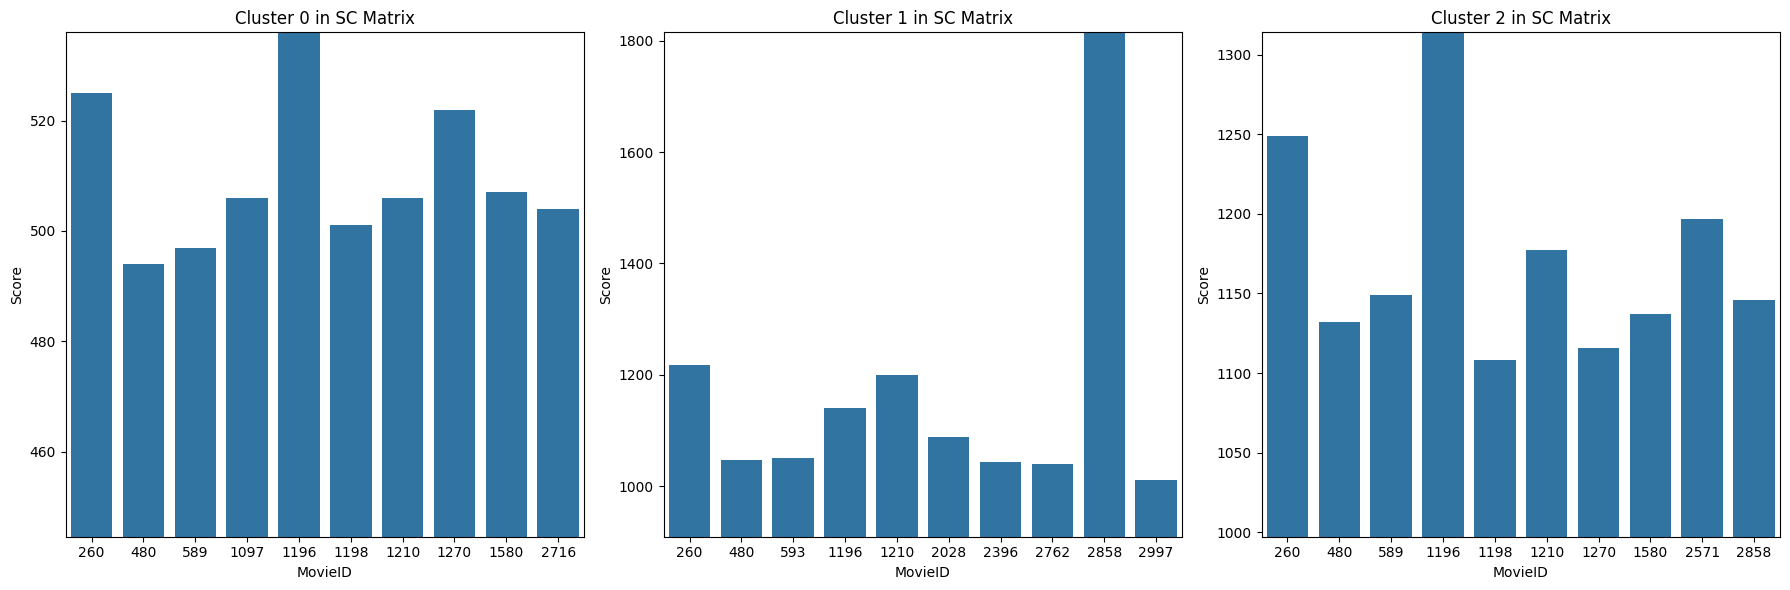

Plotting for AV Matrix
AV Matrix - Cluster 0: Top MovieIDs: [260, 1198, 1196, 593, 858, 608, 1270, 2858, 296, 318]
AV Matrix - Cluster 1: Top MovieIDs: [2858, 260, 2028, 593, 2762, 1196, 527, 1210, 2396, 608]
AV Matrix - Cluster 2: Top MovieIDs: [1196, 260, 2571, 1198, 2858, 2028, 593, 589, 1210, 2762]


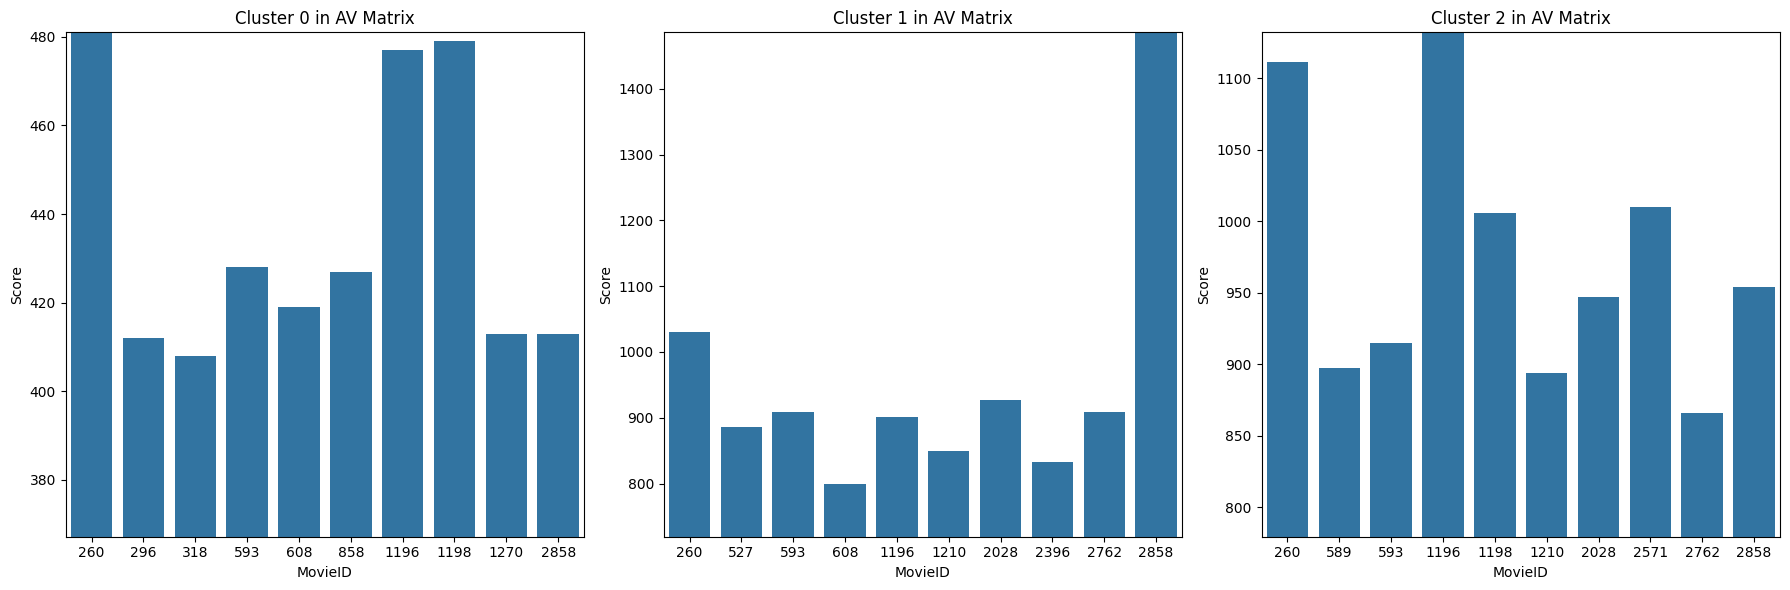

Plotting for BC Matrix
BC Matrix - Cluster 0: Top MovieIDs: [1196, 260, 1198, 1270, 1210, 608, 1097, 296, 593, 2716]
BC Matrix - Cluster 1: Top MovieIDs: [2858, 260, 1210, 1196, 2028, 593, 2762, 480, 2396, 2997]
BC Matrix - Cluster 2: Top MovieIDs: [1196, 260, 2571, 1210, 2858, 589, 1580, 1198, 480, 1270]


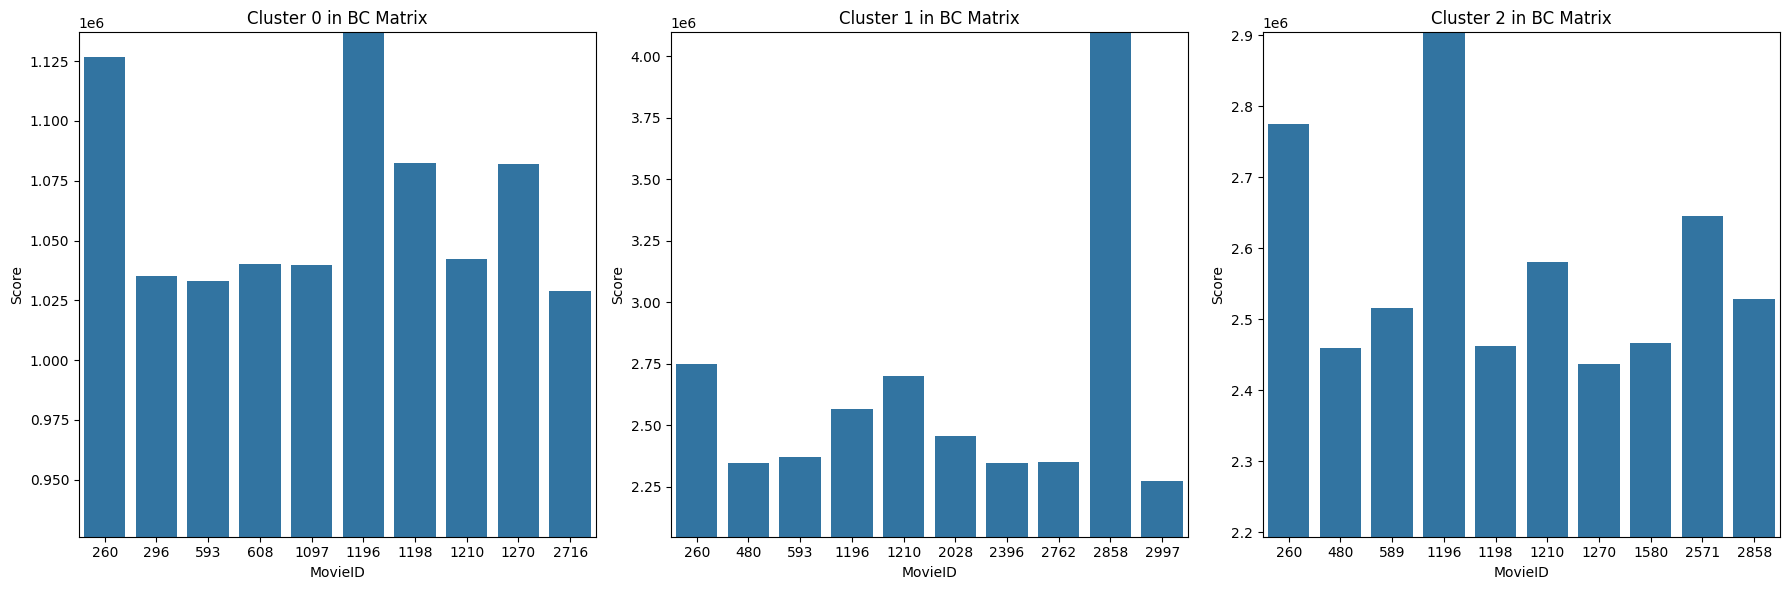

Plotting for CR Matrix
CR Matrix - Cluster 0: Top MovieIDs: [591, 634, 660, 843, 1311, 1383, 1430, 1538, 1720, 1905]
CR Matrix - Cluster 1: Top MovieIDs: [59, 108, 127, 133, 243, 411, 559, 572, 607, 643]
CR Matrix - Cluster 2: Top MovieIDs: [138, 142, 200, 411, 614, 641, 703, 730, 821, 847]


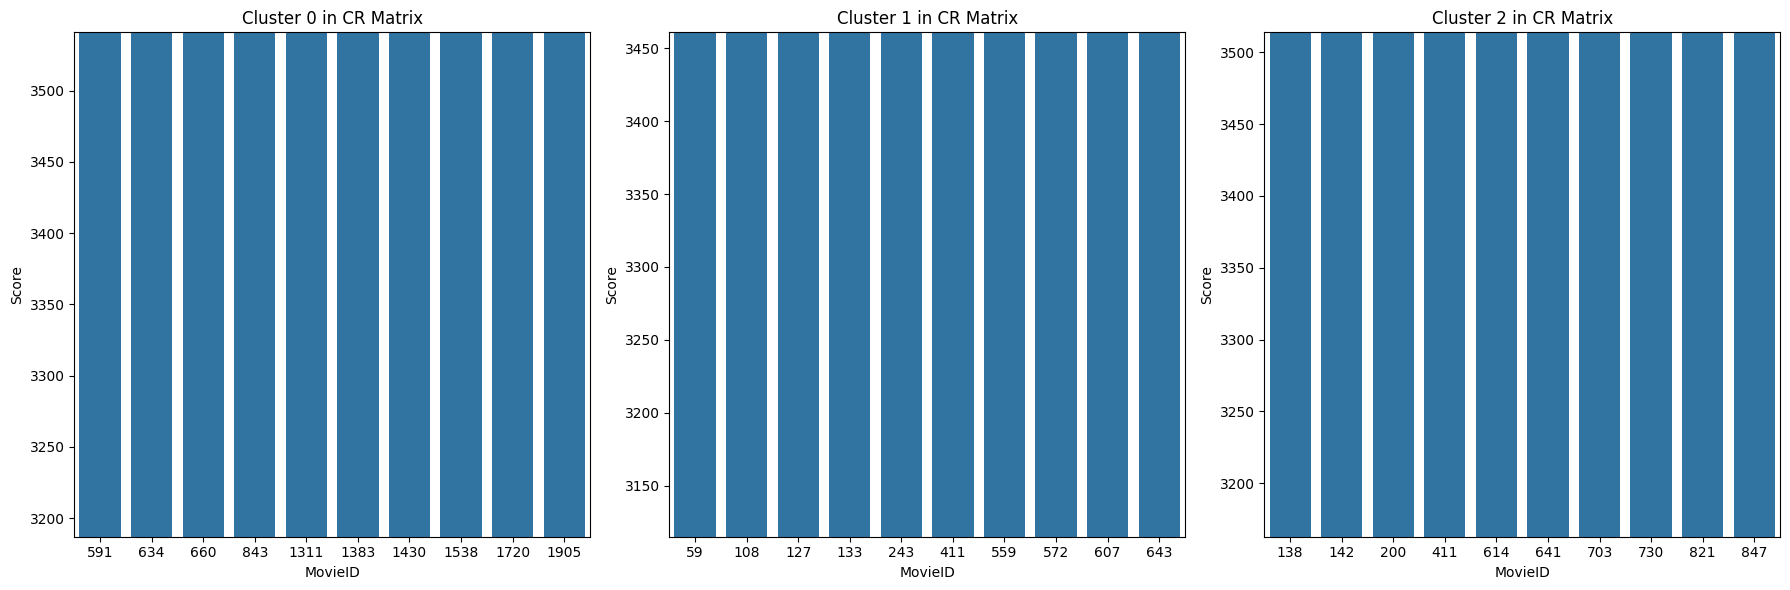

In [ ]:
# for문을 통해 각 matirx의 결과를 출력하기 위한 배열 생성
matrices = {
    'AU': au_matrix,
    'Avg': avg_matrix,
    'SC': sc_matrix,
    'AV': av_matrix,
    'BC': bc_matrix,
    'CR': cr_matrix
}

# 각 결과 matirx를 통해 상위 10개의 값을 뽑아 추천하는 MovieID를 출력하는 함수
def plot_top_movies(matrix, matrix_name):
    # 같은 matirx에 대해서는 1줄에 출력하기 위해 plot의 구조 설정
    # cluster마다 최대값과 최소값은 상이하므로 각 함수별로 ylim은 다르게 설정
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
    for cluster in matrix.index:
        cluster_data = matrix.loc[cluster]
        top_movies = cluster_data.nlargest(10)  # 상위 10개 값 추출
        movie_ids = top_movies.index
        scores = top_movies.values
        # 상위 10개에 대해 cluster와 movid id 출력
        print(f'{matrix_name} Matrix - Cluster {cluster}: Top MovieIDs: {list(movie_ids)}')

        ax = axes[cluster]
        sns.barplot(x=movie_ids, y=scores, ax=ax)
        ax.set_title(f'Cluster {cluster} in {matrix_name} Matrix')
        ax.set_xlabel('MovieID')
        ax.set_ylabel('Score')
        # 값의 차이를 좀 더 명확히 볼 수 있도록 y축 범위를 상위 10개의 (최소값*0.9)와 최대값으로 설정
        ax.set_ylim(min(scores)*0.9, max(scores))

    plt.tight_layout()
    plt.show()

# 각 matirx별로 상위 10개의 MovieId를 출력해주는 함수를 수행
for name, matrix in matrices.items():
    print(f"Plotting for {name} Matrix")
    plot_top_movies(matrix, name)